# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [33]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1200)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
len(cities)

537

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [34]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
base_url = f"{url}appid={weather_api_key}&units={units}&q="

In [35]:
# set up lists to hold reponse info
city_name=[]
country= []
lat = []
lng=[]
temp = []
humid= []
cloud= []
wind= []
    
# Loop through the list of cities and perform a request for data on each
for city in cities:
#    response = requests.get(base_url + city).json()
#    print(response)
    try:
        response = requests.get(base_url + city).json()

        city_name.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])

# Handle exceptions for cities that do not create a valid url
    except:
#        print("City not found")
        pass

In [36]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": city_name,
    "country":country,
    "lat": lat,
    "lng": lng,
    "temp": temp,
    "humidity": humid,
    "cloudiness": cloud,
    "wind_speed": wind
}
weather_dict
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,city,country,lat,lng,temp,humidity,cloudiness,wind_speed
0,Solnechnyy,RU,50.72,136.63,59.43,54,100,3.24
1,Port Alfred,ZA,-33.59,26.89,49.82,63,16,21.61
2,Ixtapa,MX,20.70,-105.20,83.08,74,90,4.70
3,Ushuaia,AR,-54.80,-68.30,32.00,93,90,13.87
4,Fort Dodge,US,42.50,-94.17,65.35,60,1,3.36


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [37]:
weather_df.shape

(497, 8)

In [38]:
#  Get the indices of cities that have humidity over 100%.
humid_df=weather_df.loc[weather_df['humidity']>=100]
humid_df

,city,country,lat,lng,temp,humidity,cloudiness,wind_speed
10,Cape Town,ZA,-33.93,18.42,41.79,100,20,1.12
57,Talnakh,RU,69.49,88.40,44.60,100,90,4.47
101,Morehead,US,37.27,-87.18,74.53,100,40,4.90
112,Jegălia,RO,44.30,27.63,66.20,100,75,6.93
250,Dudinka,RU,69.41,86.18,44.60,100,90,4.47
312,Mahuta,TZ,-10.87,39.45,60.91,100,0,2.68
318,Valdivia,CL,-39.81,-73.25,35.60,100,0,3.36
337,Avera,US,33.19,-82.53,79.12,100,1,4.70
350,Laas,IT,46.62,10.70,52.63,100,90,6.93
385,Phalaborwa,ZA,-23.94,31.14,64.40,100,83,13.87


In [39]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=weather_df.drop(weather_df.loc[weather_df['humidity']>=100].index, inplace=False)
clean_city_data.shape

(485, 8)

In [41]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Analysis: This plot displays the Temperature (F) of various cities versus the latitude of the cities.  As expected, this plot clearly shows that cities close to the equator have a higher temperature.

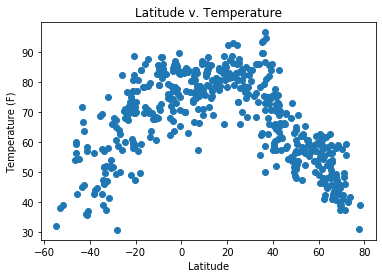

In [42]:
# Plot out rooms versus median house price
x_values = clean_city_data['lat']
y_values = clean_city_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title("Latitude v. Temperature")
plt.savefig("output_data/Lat_Temp.png")

## Latitude vs. Humidity Plot

Analysis: This plot displays the Humidity (%) of various cities versus the latitude of the cities.  Cities with high humidity are found at any latitude, however the cities with the lowest humidity are somewhat close to the equator.  These are likely cities in desert regions.

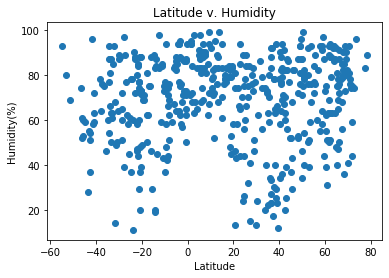

In [43]:
x_values = clean_city_data['lat']
y_values = clean_city_data['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("Latitude v. Humidity")
plt.savefig("output_data/Lat_Humidity.png")

## Latitude vs. Cloudiness Plot

Analysis: This plot displays the Cloudiness (%) of various cities versus the latitude of the cities.  Cities of various cloudiness are found at all latitudes.

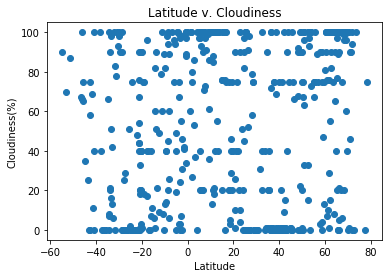

In [44]:
x_values = clean_city_data['lat']
y_values = clean_city_data['cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("Latitude v. Cloudiness")
plt.savefig("output_data/Lat_Cloudiness.png")

## Latitude vs. Wind Speed Plot

Analysis: This plot displays the Wind Speed (MPH) of various cities versus the latitude of the cities.  Cities with various wind speeds are found at all latitudes, however the cities with the highest wind speeds are located far south of the equator.

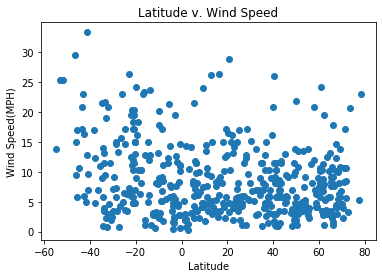

In [45]:
x_values = clean_city_data['lat']
y_values = clean_city_data['wind_speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(MPH)')
plt.title("Latitude v. Wind Speed")
plt.savefig("output_data/Lat_Wind.png")

## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots

In [46]:
# Create Northern and Southern Hemisphere DataFrames
northern_cities=clean_city_data.loc[clean_city_data['lat']>=0]
southern_cities=clean_city_data.loc[clean_city_data['lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Analysis- Here is it is much more clear that Temperature increases as latitude gets closer to the equator.  This is the strongest correlation that we see across these graphs.

The r-squared is: 0.6459152598952412


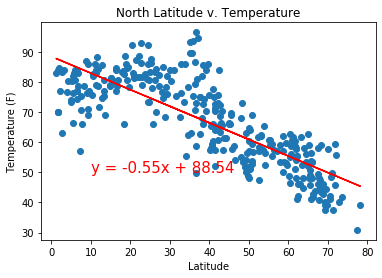

In [48]:
x_values = northern_cities['lat']
y_values = northern_cities['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title("North Latitude v. Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/North_Lat_Temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Analysis- Here is it is much more clear that Temperature increases as latitude gets closer to the equator.  This is the strongest correlation that we see across these graphs.

The r-squared is: 0.5372211007828187


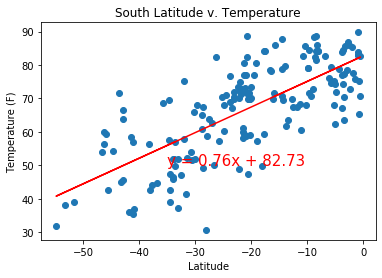

In [49]:
x_values = southern_cities['lat']
y_values = southern_cities['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title("South Latitude v. Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/South_Lat_Temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Analysis- Here we see that high Humidity occurs at any latitude, however low humidity is only likely to occur at 20 to 45 degrees above the equator.

The r-squared is: 0.0024169996060772877


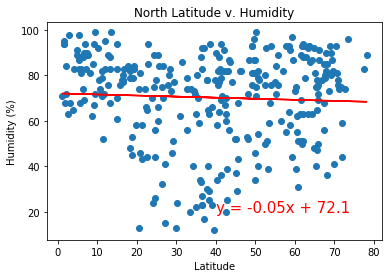

In [50]:
x_values = northern_cities['lat']
y_values = northern_cities['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("North Latitude v. Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/North_Lat_Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
Analysis- Here we see that high Humidity occurs at any latitude, however low humidity is only likely to occur at 10 to 20 degrees below the equator.

The r-squared is: 0.021394977935422988


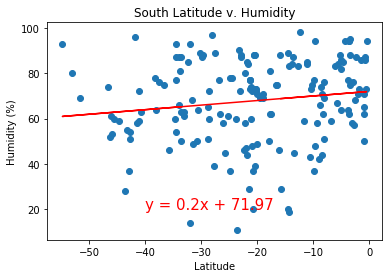

In [51]:
x_values = southern_cities['lat']
y_values = southern_cities['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("South Latitude v. Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/South_Lat_Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Analysis- Here we see that all levels of cloudiness occur at any latitude.

The r-squared is: 1.700767167571969e-05


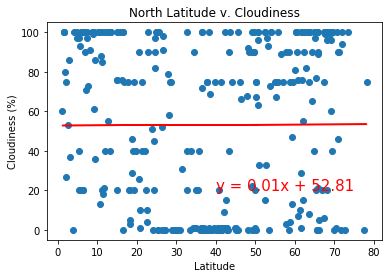

In [52]:
x_values = northern_cities['lat']
y_values = northern_cities['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("North Latitude v. Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/North_Lat_Cloudy.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Analysis- Here we see that all levels of cloudiness occur at any latitude.

The r-squared is: 0.0061843592918712255


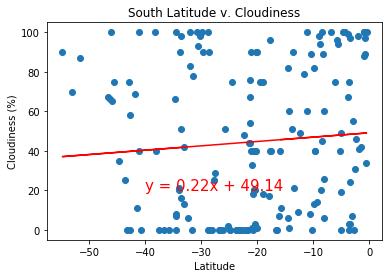

In [53]:
x_values = southern_cities['lat']
y_values = southern_cities['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("South Latitude v. Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/South_Lat_Cloudy.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Analysis- Here we see that low levels of windspeed occur at any latitude, however the highest levels of windspeed occur at 30 to 70 degrees above the equator.

The r-squared is: 8.977965430048789e-06


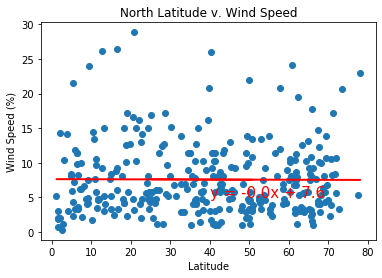

In [54]:
x_values = northern_cities['lat']
y_values = northern_cities['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.title("North Latitude v. Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/North_Lat_Wind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
Analysis- Here we see that low levels of windspeed occur at any latitude, however the highest levels of windspeed occur at 40 to 60 degrees below the equator.

The r-squared is: 0.08923336981901743


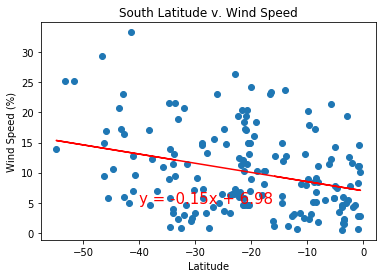

In [55]:
x_values = southern_cities['lat']
y_values = southern_cities['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.title("South Latitude v. Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/South_Lat_Wind.png")